## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Create X y dataset
X, y, coef = make_regression(n_samples = 100, n_features = 1,  
                                         n_targets = 1, noise = 25, coef = True)


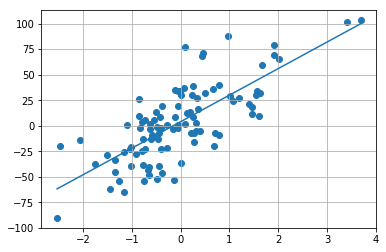

In [3]:
# Plot data

plt.scatter(X, y)
plt.plot(np.unique(X.flatten()), np.poly1d(np.polyfit(X.flatten(), y, 1))(np.unique(X.flatten())))
plt.grid(True)
plt.show()

In [4]:
# Create a dataframe of the features and add the target
df = pd.DataFrame(X)
df.columns = ['X']
df['y'] = y
print('Dataframe Head')
print(df.head())

Dataframe Head
          X           y
0 -0.061326   19.676692
1  0.210967   -7.459762
2  0.671167   35.844724
3  0.088328   76.688229
4  3.411699  101.177391


In [5]:
# Print descriptive stats
print(df.describe())

                X           y
count  100.000000  100.000000
mean    -0.044849    2.886873
std      1.074195   37.300143
min     -2.539147  -90.228872
25%     -0.737203  -21.799387
50%     -0.129239    0.511953
75%      0.407031   26.913173
max      3.691940  103.252340


In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X.ravel(), y.ravel())
print('slope: ', slope)
print('intercept: ', intercept)
print('r_value: ', r_value)
print('r_squared: ', r_value**2)
print('p_value: ', p_value)
print ('std_err: ', std_err)

slope:  25.934864063
intercept:  4.0500287126
r_value:  0.746890024902
r_squared:  0.557844709298
p_value:  4.58934729032e-19
std_err:  2.33239279894


In [7]:
# Create model
# http://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html
# https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/

model = ols("y ~ X", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     123.6
Date:                Sat, 15 Sep 2018   Prob (F-statistic):           4.59e-19
Time:                        22:15:59   Log-Likelihood:                -462.49
No. Observations:                 100   AIC:                             929.0
Df Residuals:                      98   BIC:                             934.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0500      2.495      1.623      0.108      -0.901       9.001
X             25.9349      2.332     11.119      0.000      21.306      30.563
==============================================================================
Omnibus:                        1.354   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.268
Skew:                           0.271   Prob(JB):                        0.531
Kurtosis:                       2.897   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

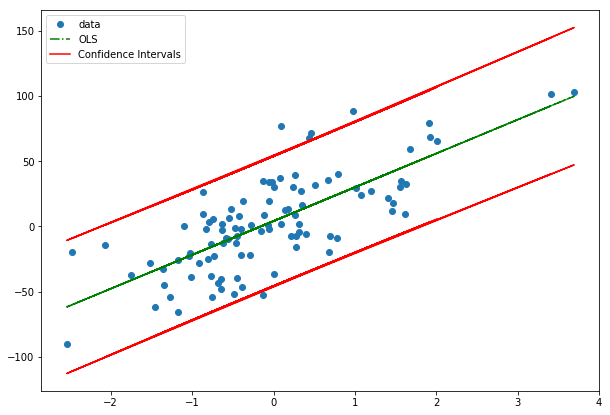

In [8]:
# Retrieve our confidence interval values with wls_prediction_std
# https://www.statsmodels.org/dev/examples/notebooks/generated/wls.html

_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(10,7))

# Plot data
ax.plot(X, y, 'o', label='data')

# Plot trend line
ax.plot(X, model.fittedvalues, 'g-.', label='OLS')

# Plot confidence interval
ax.plot(X, confidence_interval_upper, 'r-', label='Confidence Intervals')
ax.plot(X, confidence_interval_lower, 'r-')

# Plot legend
ax.legend(loc='best');

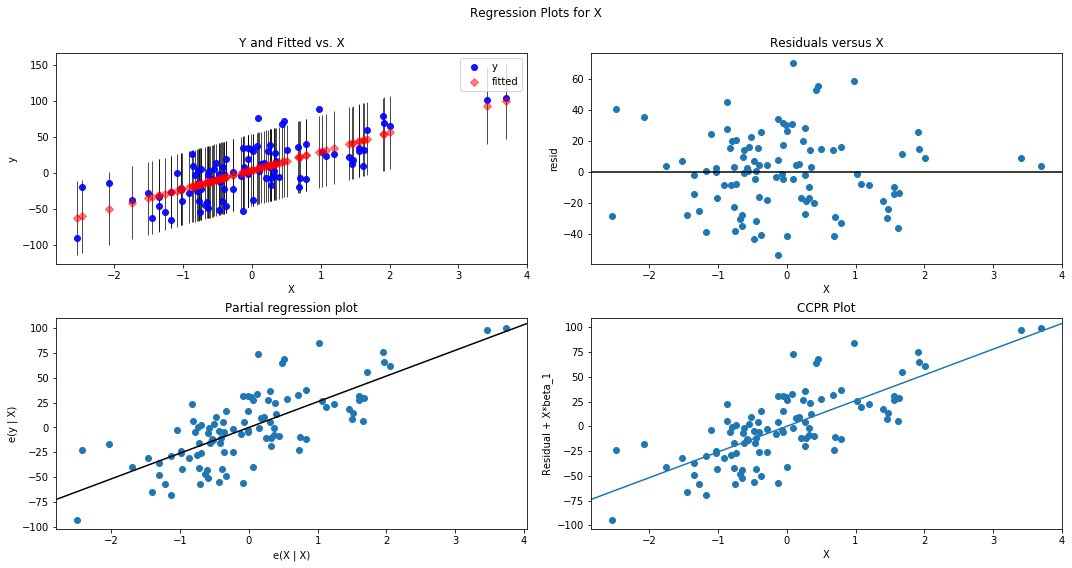

In [9]:
# Regression plots
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "X", fig=fig)

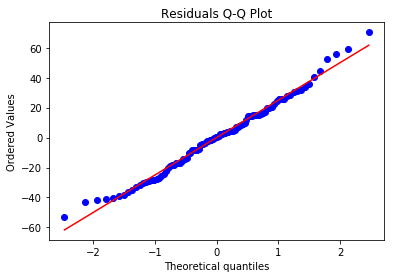

In [10]:
# Probability Plot
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("Residuals Q-Q Plot")
plt.show()

In [11]:
# https://pythonfordatascience.org/linear-regression-python/
# Assumption of multicollinearity
print(df.corr())

         X        y
X  1.00000  0.74689
y  0.74689  1.00000


In [12]:
# Assumption of independent errors
print(statsmodels.stats.stattools.durbin_watson(model.resid))

2.18934661596


In [13]:
# Assumption of normality of the residuals
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print(lzip(name, test))

[('Jarque-Bera', 1.2675296525171513), ('Chi^2 two-tail prob.', 0.53059045513302217), ('Skew', 0.2709500528083848), ('Kurtosis', 2.8972800304874937)]


In [14]:
# Assumption of homoscedasticity
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
print(lzip(name, test))

[('Lagrange multiplier statistic', 0.11023287628630918), ('p-value', 0.739879165112731), ('f-value', 0.10814743278637463), ('f p-value', 0.74296491848254997)]



Values for the line equation from the first several iterations of the gradient descent
Iteration 0: y = 0.2887 + 2.9497x and the cost: 609.9999
Iteration 6: y = 1.6994 + 14.7873x and the cost: 377.2007
Iteration 12: y = 2.6302 + 20.5204x and the cost: 321.9471
Iteration 18: y = 3.2125 + 23.3008x and the cost: 308.7315
Iteration 24: y = 3.5646 + 24.6512x and the cost: 305.5424

Via formula: y = 4.0500 + 25.9349x


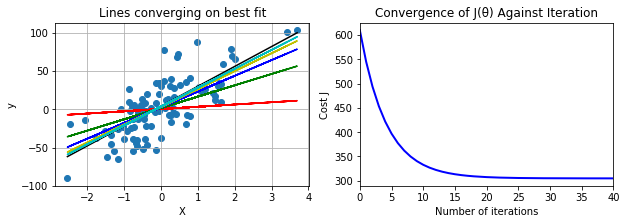

In [15]:
def cost_function(X, y, theta):

    return ((X.dot(theta) - np.vstack(y.T)) ** 2).sum()/(2 * y.size)

def gradientDescent(X, y, theta, alpha, num_iters):

    # Initialize values
    J_history = np.zeros((num_iters, 1))
    colors = ['r', 'g', 'b', 'y', 'c']
    j = 0
    print()
    print('Values for the line equation from the first several iterations of the gradient descent')

    for i in range(num_iters):       
        # beta = beta - alpha * (X.T.dot(X.dot(beta)-y)/m)
        theta = theta - alpha*(1.0/m) * X.T.dot(X.dot(theta) - np.vstack(y.T))

        # cost history    
        J_history[i] = cost_function(X, y, theta)
        
        if i < 30 and i % 6 == 0:
            # Show some thetas and costs in the line equation as it approaches best fit
            # Assuming convergence is before 30 iterations
            print ('Iteration {}: y = {:0.4f} + {:0.4f}x and the cost: {:0.4f}'.format(i, theta[0][0], theta[1][0], J_history[i][0]))
            plt.plot(Xcopy, theta[0][0] + theta[1][0] * Xcopy, '-', c=colors[j])
            j += 1

    return theta, J_history

# Andrew Ng's M&Ns
m, n = X.shape # observations, features

# Save original X
Xcopy = X.copy()
Xcopy = Xcopy.flatten()

# Reshape X and add bias
X = np.append(arr = np.ones((y.size, 1)).astype(int), values = X.reshape(y.size, 1), axis = 1)

# Plot equation lines based on gradient descent
plt.figure(figsize=(10,3))

plt.subplot(121)

# Plot data 
# y = 0.1383 + 0.7234x
plt.scatter(Xcopy, y)

# plt.plot(Xcopy, a1 + b1 * Xcopy, 'r-', linewidth=3)
plt.plot(np.unique(Xcopy), np.poly1d(np.polyfit(Xcopy, y, 1))(np.unique(Xcopy)), 'k-')

plt.grid(True)
plt.title('Lines converging on best fit')
plt.xlabel('X')
plt.ylabel('y')

# Choose a learning rate
alpha = 0.1
num_iters = 1000

# Init weights and run gradient descent 
# theta = np.zeros((X.shape[1], 1)) 
theta=[[0], [0]]
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Get slope and intercept
# denominator = y.size * sum(map(lambda x:x*x,X)) - X.sum()**2
# a = ((y.sum() * X.dot(X)) - (X.sum() * sum(X * y))) / denominator
# b = ((y.size * sum(X * y)) - (X.sum() * y.sum())) / denominator
# print()
# print ('y = {:0.4f} + {:0.4f}x'.format(a, b))

# Similar method to get slope and intercept
d = Xcopy.dot(Xcopy) - Xcopy.mean() * Xcopy.sum()
a1 = ( y.mean() * Xcopy.dot(Xcopy) - Xcopy.mean() * Xcopy.dot(y) ) / d
b1 = ( Xcopy.dot(y) - y.mean() * Xcopy.sum() ) / d
print()
print ('Via formula: y = {:0.4f} + {:0.4f}x'.format(a1, b1))

plt.subplot(122)

# Plot the graph
plt.plot(range(J_history.size), J_history, "-b", linewidth=2 )
plt.title('Convergence of J(\u03B8) Against Iteration')
# r'J($\theta$)'
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.xlim((0, 40))
plt.show(block=False)

In [16]:
# print()
# print('Theta via Make Regression Function')
# print(pd.DataFrame(coef, columns=['True Coefficient Values']))
# print()
print('Cost and theta values')
print(J_history[-1][0])
print(theta.flatten())

Cost and theta values
304.50961907
[  4.05002871  25.93486406]


Intercept:  5.14823264017
Coefficients:  25.840533006
Mean squared error: 437.25
Root mean squared error: 20.91
Mean absolute error: 17.27
Variance score: 0.43


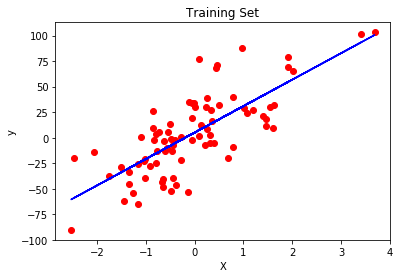

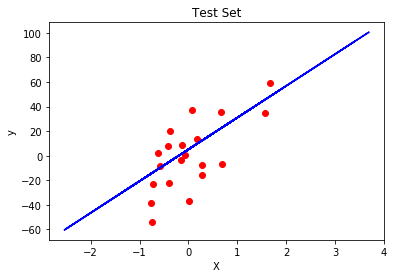

In [17]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xcopy.reshape(y.size,1), y, test_size = 1/5, random_state = 0)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# The intercept coefficient
# https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
print('Intercept: ', regressor.intercept_)
print('Coefficients: ', regressor.coef_[0])
# The mean squared error mse
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The root mean squared error rmse
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error mae
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Training Set')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Test Set')
plt.xlabel('X')
plt.ylabel('y')
plt.show()